## IMPORTANDO LIBRERIAS

In [4]:
import os
import csv
import sqlite3
import tkinter as tk
import tkinter.ttk as ttk
import numpy as np
import matplotlib.pyplot as plt
ruta_home = os.getcwd()
print(ruta_home)

D:\CICLO_2020_2\PROGRA AVANZADA\LAB1_2020_2\Laboratorio 01


## OBTENIENDO DATA GENERAL

In [5]:
data = []
PATH = '.\CSV Files'
for item in os.listdir(PATH):
    if item.endswith(".csv"):
        #Lectura del archivo CSV
        with open(PATH + '\\' + item, encoding = 'utf-8') as csv_file:
            reader = csv.reader(csv_file, delimiter=",")
            next(reader)
            
            for idx,col in enumerate(reader):
                if col[1].strip() == 'SUB-SAHARAN AFRICA': #N1
                    data_col = ((idx,col[0].strip(),0,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'LATIN AMER. & CARIB':
                    data_col = ((idx,col[0].strip(),1,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'ASIA (EX. NEAR EAST)':
                    data_col = ((idx,col[0].strip(),2,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'NEAR EAST':
                    data_col = ((idx,col[0].strip(),3,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'OCEANIA':
                    data_col = ((idx,col[0].strip(),4,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'NORTHERN AMERICA':
                    data_col = ((idx,col[0].strip(),5,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'C.W. OF IND. STATES':
                    data_col = ((idx,col[0].strip(),6,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'WESTERN EUROPE':
                    data_col = ((idx,col[0].strip(),7,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'NORTHERN AFRICA':
                    data_col = ((idx,col[0].strip(),8,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'EASTERN EUROPE':
                    data_col = ((idx,col[0].strip(),9,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                elif col[1].strip() == 'BALTICS':
                    data_col = ((idx,col[0].strip(),10,col[2].strip(),
                             col[3].strip(),col[4].strip(),col[5].strip(),
                             col[6].strip(),col[7].strip(),col[8].strip(),
                             col[9].strip()))
                
                data.append(data_col)
#DATA FINAL DE PAISES = data

In [6]:
data_regiones = []
data_reg= []
PATH = '.\CSV Files'
for item in os.listdir(PATH):
    if item.endswith(".csv"):
        #Lectura del archivo CSV
        with open(PATH + '\\' + item, encoding = 'utf-8') as csv_file:
            reader = csv.reader(csv_file, delimiter=",")
            next(reader)
            
            for col in reader:
                data_regiones.append(col[1].strip())
            
            data_regiones = list(set(data_regiones))

for idx, valor in enumerate(data_regiones):
    datos = ((idx,valor))
    data_reg.append(datos)
    
#DATA FINAL DE REGIONES = data_reg

In [7]:
conn = sqlite3.connect('database.db')
cur = conn.cursor()

#Creacion de la tabla 'paises'
try:
    cur.execute("DROP TABLE regiones")
    conn.commit
except:
    pass

sql = """CREATE TABLE IF NOT EXISTS regiones (id_region INTEGER NOT NULL PRIMARY KEY, 
                                            nom_region TEXT NOT NULL)"""
cur.execute(sql)
conn.commit()

#Se carga la información a partir de el archivo de los paises
sql = """INSERT INTO regiones(id_region, nom_region)
        VALUES (?,?)"""
cur.executemany(sql,data_reg)
conn.commit()
conn.close()

In [8]:
conn = sqlite3.connect('database.db')
cur = conn.cursor()

#Creacion de la tabla 'paises'
try:
    cur.execute("DROP TABLE paises")
    conn.commit
except:
    pass

sql = """CREATE TABLE IF NOT EXISTS paises (id_pais INTEGER NOT NULL PRIMARY KEY, nombre_pais TEXT NOT NULL,\
                                            id_region INTEGER NOT NULL, poblacion INTEGER NOT NULL,\
                                            area INTEGER NOT NULL, den_pol FLOAT NOT NULL, lin_cost FLOAT NOT NULL,\
                                            migr_neta FLOAT NOT NULL, mort_inf FLOAT NOT NULL, pbi INTEGER NOT NULL,\
                                            alfabetismo FLOAT NOT NULL,
                                            FOREIGN KEY (id_region) REFERENCES regiones(id_region))"""
cur.execute(sql)
conn.commit()

#Se carga la información a partir de el archivo de los paises
sql = """INSERT INTO paises
            (id_pais, nombre_pais, id_region, poblacion, area,den_pol,
             lin_cost, migr_neta, mort_inf,pbi,alfabetismo)
        VALUES (?,?,?,?,?,?,?,?,?,?,?)"""
cur.executemany(sql,data)
conn.commit()
conn.close()

## CREACION DE LA CLASE DATABASE

In [9]:
class Database:
    def __init__(self,datafile):
        self.conn = sqlite3.connect(datafile)
        self.cur = self.conn.cursor()
        
    def __del__(self):
        self.conn.close()
  
    #SE HALLAN LOS PAISES EN LAS REGION
    def paises_en_reg(self, region):
        sql = """SELECT nombre_pais
                    FROM regiones
                    JOIN paises
                    ON paises.id_region = regiones.id_region
                    WHERE nom_region = ?
                    """
        self.cur.execute(sql,(region,))
        return [items[0] for items in self.cur]
    
    #SE HALLAN EL PAIS Y SU POBLACION EN LA REGION
    def poblacion_paises(self,region):
        sql = """SELECT nombre_pais, poblacion
                    FROM regiones
                    JOIN paises
                    ON paises.id_region = regiones.id_region
                    WHERE nom_region = ?
                    ORDER BY poblacion DESC
                    """
        return self.cur.execute(sql, (region,)).fetchall()
    
    def area_paises(self,region):
        sql = """SELECT nombre_pais, area
                    FROM regiones
                    JOIN paises
                    ON paises.id_region = regiones.id_region
                    WHERE nom_region = ?
                    ORDER BY area DESC
                    """
        return self.cur.execute(sql, (region,)).fetchall()
    
    def densidad_paises(self,region):
        sql = """SELECT nombre_pais, den_pol
                    FROM regiones
                    JOIN paises
                    ON paises.id_region = regiones.id_region
                    WHERE nom_region = ?
                    ORDER BY den_pol DESC
                    """
        return self.cur.execute(sql, (region,)).fetchall()
    
    def linea_paises(self,region):
        sql = """SELECT nombre_pais, lin_cost
                    FROM regiones
                    JOIN paises
                    ON paises.id_region = regiones.id_region
                    WHERE nom_region = ?
                    ORDER BY lin_cost DESC
                    """
        return self.cur.execute(sql, (region,)).fetchall()

## PRUEBAS DEL DATABASE

In [10]:
db = Database("database.db")
#print(db.paises_en_reg('SUB-SAHARAN AFRICA'))
#print(len(db.paises_en_reg('SUB-SAHARAN AFRICA')))
print(db.linea_paises('SUB-SAHARAN AFRICA'))
print(len(db.linea_paises('SUB-SAHARAN AFRICA')))
del(db)

[('Croatia', '10,32'), ('Albania', '1,26'), ('Bulgaria', '0,32'), ('Slovenia', '0,23'), ('Poland', '0,16'), ('Romania', '0,09'), ('Bosnia & Herzegovina', '0,04'), ('Czech Republic', '0,00'), ('Hungary', '0,00'), ('Macedonia', '0,00'), ('Serbia', '0,00'), ('Slovakia', '0,00')]
12


[90.47, 9.84, 9.3, 7.06, 61.07, 6.38, 59.8, 52.29, 51.72, 39.22, 37.92, 35.49, 35.17, 34.54, 31.82, 3.63, 3.37, 3.18, 25.65, 25.41, 22.51, 21.59, 2.64, 2.52, 19.63, 17.19, 1.68, 1.46, 0.85, 0.79, 0.73, 0.7, 0.47, 0.42, 0.37, 0.37, 0.31, 0.28, 0.24, 0.21, 0.19, 0.18, 0.09, 0.0, 0.0]


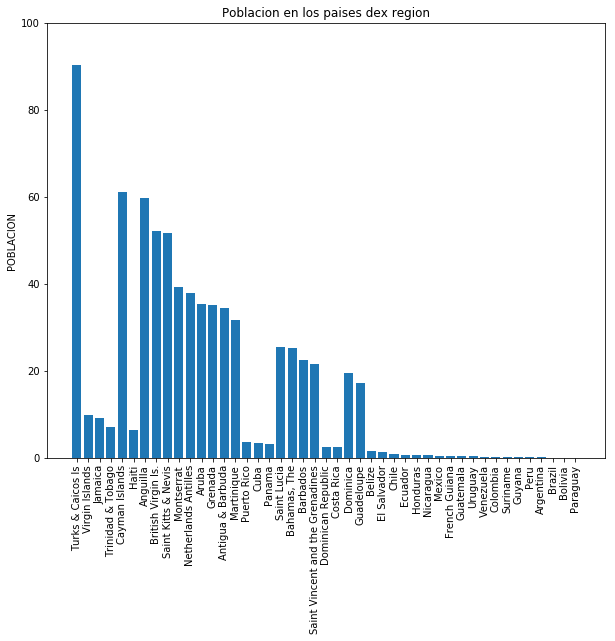

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
 
prueba_regiones = [region[1] for region in data_reg]
db = Database("database.db")
poblacion = [valor[1] for valor in db.linea_paises(prueba_regiones[1])]
new_pob = []
for dato in poblacion:
    dato = dato.replace(',','.')
    dato = float(dato)
    new_pob.append(dato)
paises = [valor[0] for valor in db.linea_paises(prueba_regiones[1])]

print(new_pob)

fig, ax = plt.subplots(figsize=(10,8))
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('POBLACION')
ax.set_ylim(0,100)
ax.set_xticklabels(paises,rotation = 90)
#Colocamos una etiqueta en el eje X
ax.set_title('Poblacion en los paises dex region')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(paises, new_pob)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

## DESARROLLO DEL GUI

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ASUS\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-18-f08661810b02>", line 91, in mostrar_paises
    seleccion = self.lstRegiones.get(self.lstRegiones.curselection())
  File "C:\Users\ASUS\Anaconda3\lib\tkinter\__init__.py", line 2798, in get
    return self.tk.call(self._w, 'get', first)
_tkinter.TclError: bad listbox index "": must be active, anchor, end, @x,y, or a number
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ASUS\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-18-f08661810b02>", line 91, in mostrar_paises
    seleccion = self.lstRegiones.get(self.lstRegiones.curselection())
  File "C:\Users\ASUS\Anaconda3\lib\tkinter\__init__.py", line 2798, in get
    return self.tk.call(self._w, 'get', first)
_tkinter.TclError: bad listbox index "":

[70413958, 27019731, 26783383, 21456188, 18881361, 6352117, 5906760, 3874050, 3102229, 2602713, 2460492, 2418393, 1428757, 885359, 784301, 698585]
['Turkey', 'Saudi Arabia', 'Iraq', 'Yemen', 'Syria', 'Israel', 'Jordan', 'Lebanon', 'Oman', 'United Arab Emirates', 'West Bank', 'Kuwait', 'Gaza Strip', 'Qatar', 'Cyprus', 'Bahrain']


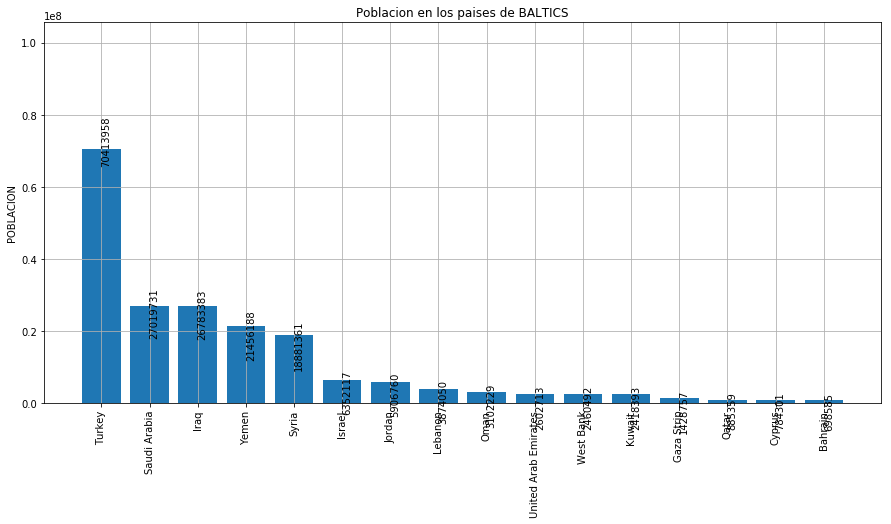

In [18]:
import tkinter as tk
import tkinter.ttk as ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from collections import deque

class App:
    def __init__(self,master):
        global seleccion
        seleccion = ""
        self.master = master
        self.master.resizable(0,0)
        self.master.title('ESTADISTICAS MUNDIALES')
        
        self.db = Database('database.db')
        
        #VARIABLES
        self.var_option = tk.IntVar()
        
        frame = tk.Frame(self.master)
        frame.pack(padx=10, pady=10)
        
        frame1 = tk.Frame(frame)
        frame2 = tk.Frame(frame)
        frame11 = tk.LabelFrame(frame1,text='REGIONES',padx=10,pady=10)
        frame12 = tk.LabelFrame(frame1,text='PAISES',padx=10,pady=10)
        frame21 = tk.Frame(frame2)
        frame22 = tk.LabelFrame(frame2,text='Estadisticas')
        
        frame1.pack(side=tk.LEFT,padx =10,pady=10)
        frame2.pack(side=tk.RIGHT,padx =10,pady=10)
        
        frame11.pack(side=tk.TOP,padx=10,pady=10)
        frame12.pack(side=tk.BOTTOM,padx=10,pady=10)
        
        frame21.pack(side=tk.TOP,padx=10,pady=10)
        frame22.pack(side=tk.BOTTOM,padx=10,pady=10)
        
        #CONFIGURACION FRAME
        frame21.config(bg='#F0F0F0')
        
        #-----------------------------FRAME 11 --------------------------------------------------------
        self.scrY1 = tk.Scrollbar(frame11,orient='vertical')
        self.lstRegiones = tk.Listbox(frame11,height=10,yscrollcommand=self.scrY1.set,
                                      highlightcolor="#0000ff",
                                      highlightbackground="#ff0000")

        self.scrY1.config(command=self.lstRegiones.yview)
        
        self.lstRegiones.pack(side=tk.LEFT)
        self.scrY1.pack(side=tk.LEFT, expand=True, fill=tk.Y)
        self.lstRegiones.bind("<<ListboxSelect>>", self.mostrar_paises)
        
        regiones = [region[1] for region in data_reg]
        for region in regiones:
            self.lstRegiones.insert(tk.END,region)
        #-----------------------------FRAME 12---------------------------------------------------------
        self.scrY2 = tk.Scrollbar(frame12,orient='vertical')
        self.lstPaises = tk.Listbox(frame12,height=12,yscrollcommand=self.scrY2.set)
        self.scrY2.config(command=self.lstPaises.yview)
        self.lstPaises.bind("<<ListboxSelect>>", self.mostrar_paises)
        
        self.lstPaises.pack(side=tk.LEFT)
        self.scrY2.pack(side=tk.LEFT, expand=True, fill=tk.Y)
        #-----------------------------FRAME 21 ---------------------------------------------------------
        self.fig, self.ax = plt.subplots(figsize=(15,7))
        
        
        self.graph = FigureCanvasTkAgg(self.fig,master=frame21)
        self.graph.get_tk_widget().pack()
        #-----------------------------FRAME 22 ---------------------------------------------------------
        self.rdoOpcion1 = tk.Radiobutton(frame22,text='Poblacion',variable=self.var_option,value=1,
                                        command = self.graph_opcion1)
        self.rdoOpcion2 = tk.Radiobutton(frame22,text='Area',variable=self.var_option,value=2,
                                        command = self.graph_opcion2)
        self.rdoOpcion3 = tk.Radiobutton(frame22,text='Dens. Poblacional',variable=self.var_option,value=3,
                                        command = self.graph_opcion3)
        self.rdoOpcion4 = tk.Radiobutton(frame22,text='Linea Costera',variable=self.var_option,value=4,
                                        command = self.graph_opcion4)
        
        self.rdoOpcion1.grid(row=0,column=0,padx=5,pady=5)
        self.rdoOpcion2.grid(row=0,column=1,padx=5,pady=5)
        self.rdoOpcion3.grid(row=0,column=2,padx=5,pady=5)
        self.rdoOpcion4.grid(row=0,column=3,padx=5,pady=5)
        
        #--------------------- B L O Q U E ------- D E -------- F U N C I O N E S ------------------------
    def mostrar_paises(self, event):
        global seleccion
        
        self.lstPaises.delete(0,tk.END)
        seleccion = self.lstRegiones.get(self.lstRegiones.curselection())
        for pais in self.db.paises_en_reg(seleccion):
            self.lstPaises.insert(tk.END,pais)
        
        if self.var_option.get() == 1:
            self.graph_opcion1()
        elif self.var_option.get() == 2:
            self.graph_opcion2()
        elif self.var_option.get() == 3:
            self.graph_opcion3()
        elif self.var_option.get() == 4:
            self.graph_opcion4()
        else:
            pass
            
    def graph_opcion1(self):
        global seleccion
        try:
            poblacion = [valor[1] for valor in self.db.poblacion_paises(seleccion)]
            paises = [valor[0] for valor in self.db.poblacion_paises(seleccion)]
            print(poblacion)
            print(paises)
           
            self.ax.cla()
            self.ax.set_ylabel('POBLACION')
            self.ax.set_ylim(0,max(poblacion) + max(poblacion)/2)
            self.ax.xaxis.set_tick_params(rotation=90)
            
            for idx,valor in enumerate(poblacion):
                self.ax.text(idx,valor+ valor/10, f'{valor}',rotation=90)
            #Colocamos una etiqueta en el eje X
            self.ax.set_title(f'Poblacion en los paises de {seleccion}')
            #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
            self.ax.bar(paises, poblacion)
            self.ax.grid()
          
            self.graph.draw()
        except:
            pass
        
    def graph_opcion2(self):
        global seleccion
        try:
            area = [valor[1] for valor in self.db.area_paises(seleccion)]
            paises = [valor[0] for valor in self.db.area_paises(seleccion)]
           
            self.ax.cla()
            self.ax.set_ylabel('AREA (milla cuadrada)')
            self.ax.set_ylim(0,max(area)+10000)
            self.ax.xaxis.set_tick_params(rotation=90)
            
            #Colocamos una etiqueta en el eje X
            self.ax.set_title(f'Area en los paises de {seleccion}')
            #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
            self.ax.plot(paises, area)
            self.ax.grid()
          
            self.graph.draw()
        except:
            pass
    def graph_opcion3(self):
        global seleccion
        try:
            dens = []
            densidad = [valor[1] for valor in self.db.densidad_paises(seleccion)]
            paises = [valor[0] for valor in self.db.densidad_paises(seleccion)]
            
            #Se convierten a flotantes
            for dato in densidad:
                dato = float(dato.replace(',','.'))
                dens.append(dato)
            
            self.ax.cla()
            self.ax.set_ylabel('DENSIDAD POBLACIONAL(persona por mill. cuadrada ())')
            self.ax.set_ylim(0,max(dens)+max(dens)/2)
            self.ax.xaxis.set_tick_params(rotation=90)
            
            for idx,valor in enumerate(dens):
                self.ax.text(idx,valor+max(dens)/10, f'{valor}',rotation=90)
            #Colocamos una etiqueta en el eje X
            self.ax.set_title(f'Densidad poblacional en los paises de {seleccion}')
            #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
            self.ax.stem(paises, dens)
            self.ax.grid()
              
            self.graph.draw()
        except:
            pass
    def graph_opcion4(self):
        global seleccion
        try:
            lin = []
            lin_cost = [valor[1] for valor in self.db.linea_paises(seleccion)]
            paises = [valor[0] for valor in self.db.linea_paises(seleccion)]
            
            for dato in lin_cost:
                dato = float(dato.replace(',','.'))
                lin.append(dato)
            
            self.ax.cla()
            self.ax.set_ylabel('LINEA COSTERA (coast/ area ratio)')
            self.ax.set_ylim(0,max(lin)+max(lin)/2)
            self.ax.xaxis.set_tick_params(rotation=90)
               
            #Colocamos una etiqueta en el eje X
            self.ax.set_title(f'Linea costera en los paises de {seleccion}')
            #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
            self.ax.plot(paises, lin,marker='x',linestyle='--',color='r')
            self.ax.grid()
              
            self.graph.draw()
        except:
            pass
        
root= tk.Tk()
app = App(root)
root.mainloop()

In [311]:
print(data_reg)

[(0, 'SUB-SAHARAN AFRICA'), (1, 'LATIN AMER. & CARIB'), (2, 'ASIA (EX. NEAR EAST)'), (3, 'NEAR EAST'), (4, 'OCEANIA'), (5, 'NORTHERN AMERICA'), (6, 'C.W. OF IND. STATES'), (7, 'WESTERN EUROPE'), (8, 'NORTHERN AFRICA'), (9, 'EASTERN EUROPE'), (10, 'BALTICS')]
